# Individual project - Machine Learning

### aim of the project : 
### realize a prediction using two models which is random forest and neural network

## Random forest model

In [1]:
#Import the library pandas to read the csv file

import pandas as pd

In [2]:
#read the csv file using read_csv function from pandas


df = pd.read_csv("credit_card_approval_cleaned.csv" , delimiter = ",") 
df 

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,TARGET
0,F,Y,N,2+ children,270000.0,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,0
1,F,N,N,No children,81000.0,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0
2,M,Y,Y,No children,270000.0,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,0
3,F,Y,Y,1 children,112500.0,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0
4,M,Y,Y,2+ children,139500.0,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537662,M,Y,N,1 children,166500.0,Secondary / secondary special,Married,With parents,-12372,-5401,1,0,1,0,Core staff,-8,0
537663,F,N,Y,No children,135000.0,Higher education,Married,With parents,-14160,-4635,1,0,0,0,Sales staff,-8,0
537664,M,N,Y,No children,180000.0,Higher education,Married,House / apartment,-24204,-2462,1,0,0,0,Private service staff,-7,0
537665,M,Y,N,No children,220500.0,Secondary / secondary special,Married,House / apartment,-22647,-3847,1,0,1,0,Laborers,-1,0


In [3]:
df['TARGET'].value_counts()

0    535705
1      1962
Name: TARGET, dtype: int64

In [4]:
df.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'JOB', 'BEGIN_MONTHS',
       'TARGET'],
      dtype='object')

In [5]:
#random forest 
#random forest
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

#



X = df.drop("TARGET" , axis = 1)

y = df["TARGET"]

X = pd.get_dummies(data=X)


 
#
# Create training/ test data split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
 
#
# Create an instance of Random Forest Classifier
#
forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=5,
                                 random_state=1,
                                 n_jobs=2)
#
# Fit the model


forest.fit(X_train, y_train)
 
#
# Measure model performance
#
y_pred = forest.predict(X_test)


print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

#print(y_pred)

Accuracy: 0.996
Confusion matrix:
[[160436    276]
 [   363    226]]
Precision: 0.450199203187251
Recall: 0.3837011884550085
F1 score: 0.4142988084326306


### We started with a simple random forest model, in order to visualize the results. As we can see the expected results are not the best, especially with the f1-score indicating the diagnosis of the loans made. About 41% of the prediction seems to have been well done. This is what we can see with the confusion matrix just above, indicating that only 226 loans were granted with the prediction and where there was actually a loan, while 276 is the number where the model tells us that the loan was granted when in reality not. 

In [11]:
#random forest 
#random forest
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV





X = df.drop("TARGET" , axis = 1)

y = df["TARGET"]

X = pd.get_dummies(data=X)

 

# Create training/ test data split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
 

# Create an instance of Random Forest Classifier

forest = RandomForestClassifier(criterion='gini', n_estimators=5, random_state=1, n_jobs=2)

# Fit the model


forest.fit(X_train, y_train)


# improved hyperparameters

params = {'max_depth': [10, 20, 30], 'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(estimator=forest, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
 
#
# Measure model performance
#
y_pred = best_model.predict(X_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

print("Classification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.997
Confusion matrix:
[[160610    102]
 [   413    176]]
Precision: 0.6330935251798561
Recall: 0.298811544991511
F1 score: 0.40599769319492496
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    160712
           1       0.63      0.30      0.41       589

    accuracy                           1.00    161301
   macro avg       0.82      0.65      0.70    161301
weighted avg       1.00      1.00      1.00    161301



### The improvement of this model, especially with the addition in the code of the "GridSearchCV" command on line 44 (in the code just above), does not improve the efficiency of the prediction that much.

In [37]:
pip install imblearn

     -------------------------------------- 226.0/226.0 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 2.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [38]:
#Creation of SMOTE Method
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sm = SMOTE(k_neighbors=3, sampling_strategy=0.75)
X_res, y_res = sm.fit_resample(X_train, y_train)
forest.fit(X_res, y_res)
# Testing the model on the test data
y_pred = forest.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9892189137079125
Confusion matrix:
 [[159136   1576]
 [   163    426]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    160712
           1       0.21      0.72      0.33       589

    accuracy                           0.99    161301
   macro avg       0.61      0.86      0.66    161301
weighted avg       1.00      0.99      0.99    161301



In [39]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
#Definition of the cross-validation


cv = RepeatedStratifiedKFold(n_splits=5,n_repeats = 1, random_state=42) #Definition of the performance metrics
cv_confusion_matrices = []
cv_precisions = []
cv_recalls = []
cv_f1_scores = []

variable_importances = np.zeros(X_res.shape[1])
# Creation of a loop over the cross-validation splits

for train_index, test_index in cv.split(X_res, y_res):
    #Split of the data based on the SMOTE data
    X_train, y_train = X_res.iloc[train_index], y_res[train_index]
    X_test, y_test = X_res.iloc[test_index], y_res[test_index]
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    # Calculation of the performance metrics
    cv_confusion_matrices.append(confusion_matrix(y_test, y_pred))
    cv_precisions.append(precision_score(y_test, y_pred))
    cv_recalls.append(recall_score(y_test, y_pred))
    cv_f1_scores.append(f1_score(y_test, y_pred))
    variable_importances += forest.feature_importances_
    
variable_importances /= cv.get_n_splits()
#Print the confusion matrices, precision, recall, and f1 score for each fold and repeat


for i, (confusion_matrix, precision, recall, f1_score) in enumerate(zip(cv_confusion_matrices, cv_precisions, cv_recalls, cv_f1_scores)):
    print(f"Fold {i+1}:")
    print("Confusion matrix:")
    print(confusion_matrix)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 score:", f1_score)

Fold 1:
Confusion matrix:
[[74263   736]
 [  112 56137]]
Precision: 0.9870588855871855
Recall: 0.9980088534907288
F1 score: 0.9925036686055762
Fold 2:
Confusion matrix:
[[74267   732]
 [   86 56163]]
Precision: 0.9871341945689428
Recall: 0.998471083930381
F1 score: 0.9927702750477267
Fold 3:
Confusion matrix:
[[74290   709]
 [  128 56120]]
Precision: 0.9875239754350772
Recall: 0.9977243635329256
F1 score: 0.9925979642190719
Fold 4:
Confusion matrix:
[[74247   751]
 [   95 56154]]
Precision: 0.9868025656796415
Recall: 0.998311081085886
F1 score: 0.992523463598282
Fold 5:
Confusion matrix:
[[74242   756]
 [   97 56152]]
Precision: 0.9867154002952133
Recall: 0.9982755248982205
F1 score: 0.9924618008607511


### Nevertheless with the "RepeatedStratifiedKFold" method which repeats the splitting and evaluation process several times with different random draws of the data, in order to reduce the impact of the variability of the results on the selection of the folds, provides a more robust estimate of the model performance. This is what we can just above.

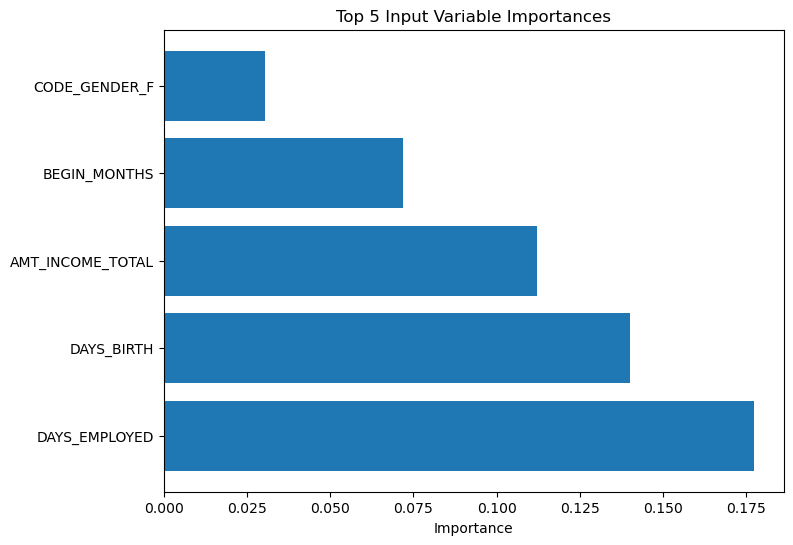

In [45]:
#Visualization of variable importance
import matplotlib.pyplot as plt #Create a horizontal bar chart of input variable importances
fig, ax = plt.subplots(figsize=(8, 6)) # Sort the variable importances in descending order
sorted_idx = variable_importances.argsort()[::-1]
sorted_importances = variable_importances[sorted_idx]
sorted_labels = X_res.columns[sorted_idx] # Show only the top 5 variables
num_vars = 5
y_pos = np.arange(num_vars)
ax.barh(y_pos, sorted_importances[:num_vars])
ax.set_yticks(y_pos)
ax.set_yticklabels(sorted_labels[:num_vars])
ax.set_xlabel('Importance')
ax.set_title(f'Top {num_vars} Input Variable Importances')
plt.show()

## Neural network

In [9]:
pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 1.6 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 993.0 kB/s eta 0:00:00
     -------------------------------------- 57.5/57.5 kB 188.9 kB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 587.7 kB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 781.3/781.3 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 17

In [50]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, recall_score
from keras.models import Sequential
from keras.layers import Dense

# read the data set
data = pd.read_csv('credit_card_approval_cleaned.csv' , delimiter = ",")


X = df.drop("TARGET" , axis = 1)

y = df["TARGET"]

X = pd.get_dummies(data=X)

# Division of data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creation of the neural network model
model = Sequential()
model.add(Dense(units=16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compilation of the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training of the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Prediction on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Calculation of evaluation metrics
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display of results
print("Matrice de confusion:")
print(cm)
print("F1 score:", f1)
print("Recall:", recall)

print("Classification report:\n", classification_report(y_test, y_pred))

Epoch 1/2
13442/13442 [==============================] - 29s 2ms/step - loss: 1.2234 - accuracy: 0.9953 - val_loss: 0.0235 - val_accuracy: 0.9965
Epoch 2/2
3361/3361 [==============================] - 4s 1ms/step
Matrice de confusion:
[[107157      0]
 [   377      0]]
F1 score: 0.0
Recall: 0.0
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    107157
           1       0.00      0.00      0.00       377

    accuracy                           1.00    107534
   macro avg       0.50      0.50      0.50    107534
weighted avg       0.99      1.00      0.99    107534



C:\Users\JWill\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JWill\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JWill\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### For the neural network, the expected results are not really conclusive. I didn't really manage to get results that are satisfactory according to the model nothing was correctly predicted. I think there must be an error somewhere.